In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Task 1: Data Cleaning and Preprocessing
df = pd.read_csv("/content/drive/MyDrive/Data Set For Task/2) Stock Prices Data Set.csv")

# View columns
print(df.columns)

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Check first few rows
print(df.head())

# Optional: filter one stock symbol if multiple exist
if 'symbol' in df.columns:
    df = df[df['symbol'] == df['symbol'].unique()[0]]

# Use only first 365 rows (simulate daily data for a year)
df = df.head(365).copy()

# Add fake date index
df['date'] = pd.date_range(start="2022-01-01", periods=len(df), freq="D")
df.set_index('date', inplace=True)

# Forward-fill price columns, 0 for volume
price_cols = ['open', 'high', 'low', 'close']
df[price_cols] = df[price_cols].fillna(method='ffill')
df['volume'] = df['volume'].fillna(0)

# Remove duplicate dates
df = df[~df.index.duplicated()]

# Save cleaned
df.to_csv("stocks_cleaned.csv")
print("✔️ Cleaned dataset saved.")


Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
  symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391
✔️ Cleaned dataset saved.


/tmp/ipython-input-2-3455934353.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[price_cols] = df[price_cols].fillna(method='ffill')


             open        high         low       close        volume
count  365.000000  365.000000  365.000000  365.000000  3.650000e+02
mean    41.983753   42.670699   41.287718   41.988876  1.279597e+07
std      6.791985    6.795412    6.684167    6.717396  9.089873e+06
min     25.070000   25.820000   25.060000   25.360000  3.863064e+06
25%     36.950000   37.600000   36.340000   36.930000  8.733197e+06
50%     41.100000   41.750000   40.260000   41.220000  1.089777e+07
75%     48.330000   49.030000   47.670000   48.240000  1.421944e+07
max     55.890000   56.200000   54.860000   55.760000  1.377672e+08


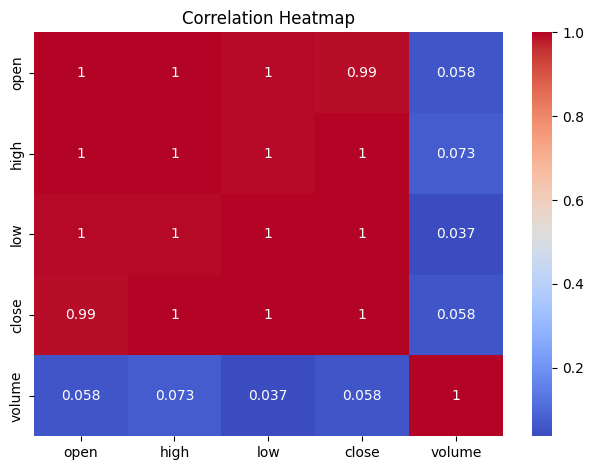

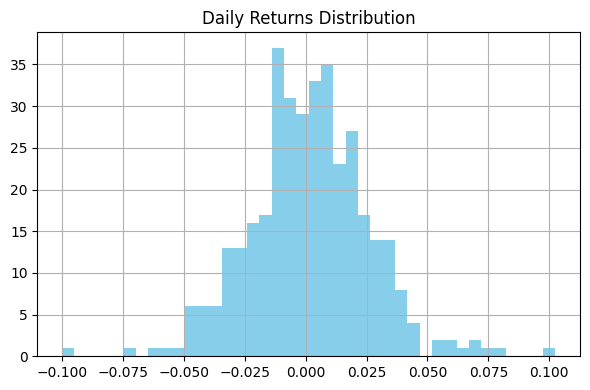

In [ ]:
# Task 2: Exploratory Data Analysis (EDA)
# Summary stats
print(df.describe())

# Correlation heatmap
sns.heatmap(df[price_cols + ['volume']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Daily returns histogram
df['returns'] = df['close'].pct_change()
df['returns'].hist(bins=40, figsize=(6,4), color='skyblue')
plt.title("Daily Returns Distribution")
plt.tight_layout()
plt.show()


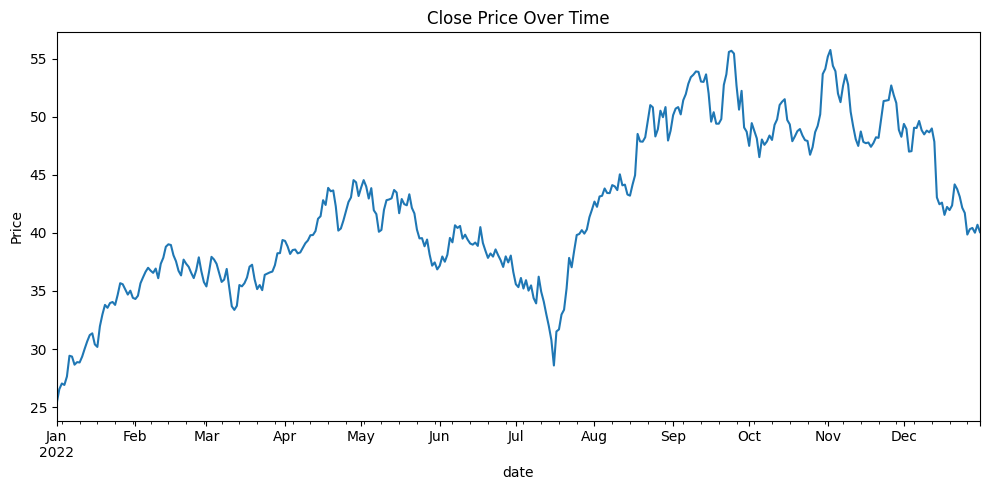

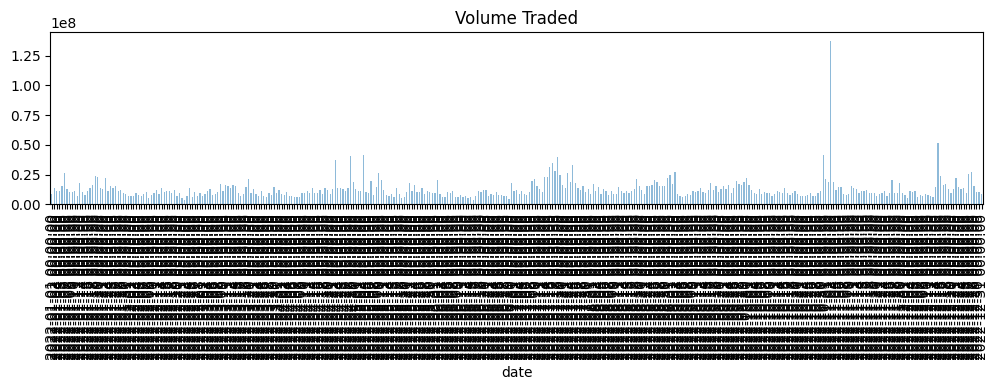

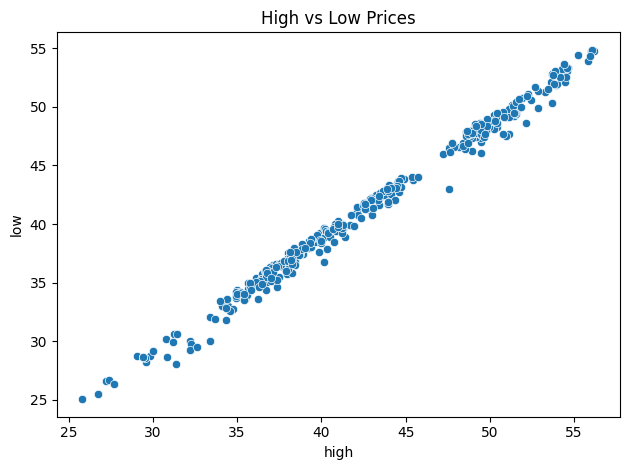

In [ ]:
# Task 3: Basic Data Visualization
# Line chart of closing price
df['close'].plot(title="Close Price Over Time", figsize=(10,5))
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# Bar plot of volume
df['volume'].plot(kind='bar', title="Volume Traded", figsize=(10,4), alpha=0.5)
plt.tight_layout()
plt.show()

# Scatter plot of high vs low
sns.scatterplot(x='high', y='low', data=df)
plt.title("High vs Low Prices")
plt.tight_layout()
plt.show()


R2 Score: 0.9165394517937814
RMSE: 1.1695161581324431


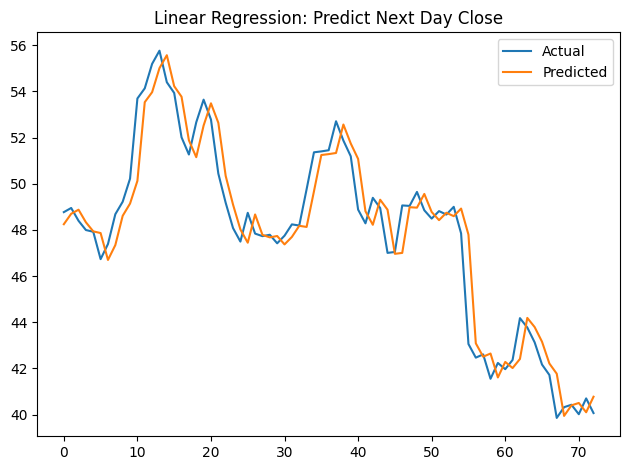

In [ ]:
# Task 1:Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['next_close'] = df['close'].shift(-1)
df.dropna(inplace=True)

X = df[['close']]
y = df['next_close']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot prediction vs actual
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Linear Regression: Predict Next Day Close")
plt.tight_layout()
plt.show()


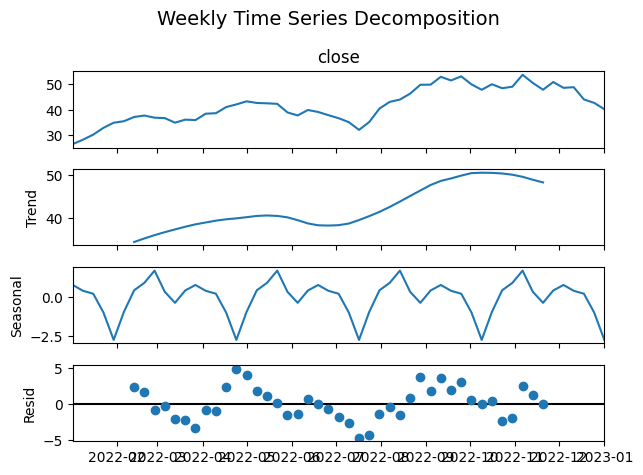

In [ ]:
# Task 2: Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample to weekly average
weekly = df['close'].resample("W").mean()

# Decompose with period=12 (weekly seasonality)
decomp = seasonal_decompose(weekly, model='additive', period=12)

# Plot components
decomp.plot()
plt.suptitle("Weekly Time Series Decomposition", fontsize=14)
plt.tight_layout()
plt.show()


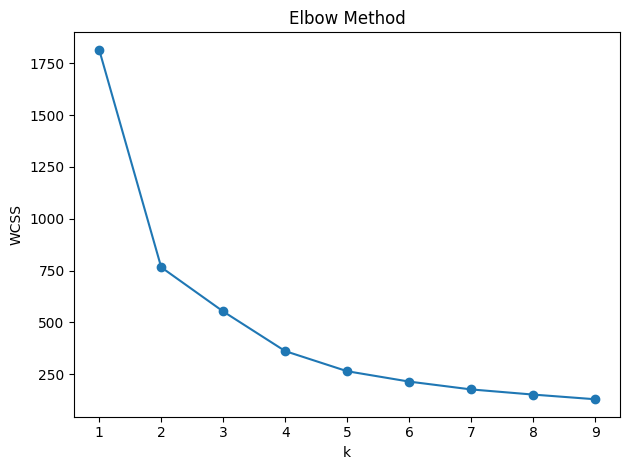

Silhouette Score: 0.45151459313451103


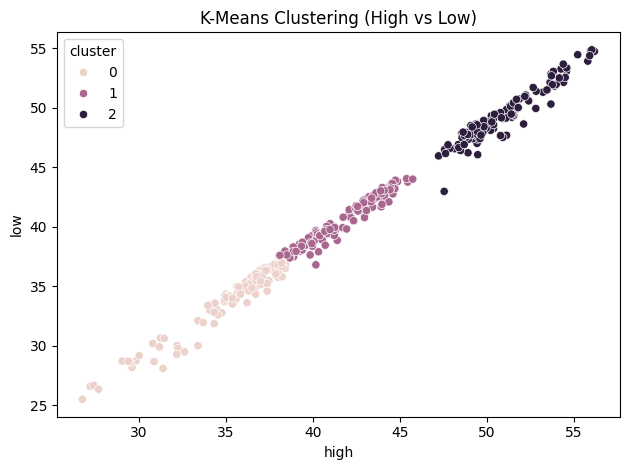

In [ ]:
# Task 3:K‑Means Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = df[['open', 'high', 'low', 'close', 'volume']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Elbow method
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.tight_layout()
plt.show()

# Fit with k=3
kmeans = KMeans(n_clusters=3, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)
print("Silhouette Score:", silhouette_score(X_scaled, df['cluster']))

# Visualize clusters
sns.scatterplot(x='high', y='low', hue='cluster', data=df)
plt.title("K-Means Clustering (High vs Low)")
plt.tight_layout()
plt.show()


In [ ]:
# Task 1: Predictive Modeling (Classification)
# Predict if next day's closing price is UP (1) or DOWN (0)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
df = pd.read_csv("stocks_cleaned.csv", parse_dates=['date'], index_col='date')

# Create target: 1 if next day is up, else 0
df['next_close'] = df['close'].shift(-1)
df['target'] = (df['next_close'] > df['close']).astype(int)
df.dropna(inplace=True)

# Features
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


In [ ]:
# Logistic Regression
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

# Random Forest
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.54      0.49      0.51        39
           1       0.47      0.53      0.50        34

    accuracy                           0.51        73
   macro avg       0.51      0.51      0.51        73
weighted avg       0.51      0.51      0.51        73

Decision Tree:
               precision    recall  f1-score   support

           0       0.48      0.38      0.43        39
           1       0.43      0.53      0.47        34

    accuracy                           0.45        73
   macro avg       0.46      0.46      0.45        73
weighted avg       0.46      0.45      0.45        73

Random Forest:
               precision    recall  f1-score   support

           0       0.54      0.36      0.43        39
           1       0.47      0.65      0.54        34

    accuracy                           0.49        73
   macro avg       0.50      0.50      0.49        73
weighted avg       0

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 4, 6],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Random Forest:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'max_depth': 6, 'n_estimators': 10}
Tuned Random Forest:
               precision    recall  f1-score   support

           0       0.71      0.38      0.50        39
           1       0.54      0.82      0.65        34

    accuracy                           0.59        73
   macro avg       0.63      0.60      0.58        73
weighted avg       0.63      0.59      0.57        73



In [ ]:
# Task 3: NLP – Sentiment Analysis
# Step 1: Setup & Sample Data
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import re

nltk.download('stopwords')
from nltk.corpus import stopwords

# Sample reviews
reviews = {
    'text': [
        "I love this product!",
        "Worst purchase ever.",
        "Amazing service, will buy again.",
        "Totally disappointed.",
        "Pretty decent overall.",
        "Terrible support, not recommended."
    ]
}
df = pd.DataFrame(reviews)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Step 2: Preprocess & Sentiment Score
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return " ".join([word for word in text.split() if word not in stopwords.words("english")])

df['clean'] = df['text'].apply(clean_text)
df['polarity'] = df['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda p: 'Positive' if p > 0 else ('Negative' if p < 0 else 'Neutral'))
print(df[['text', 'sentiment']])


                                 text sentiment
0                I love this product!  Positive
1                Worst purchase ever.  Negative
2    Amazing service, will buy again.  Positive
3               Totally disappointed.  Negative
4              Pretty decent overall.  Positive
5  Terrible support, not recommended.  Negative


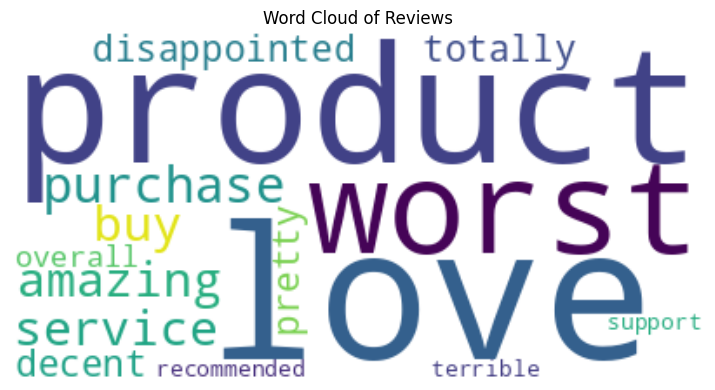

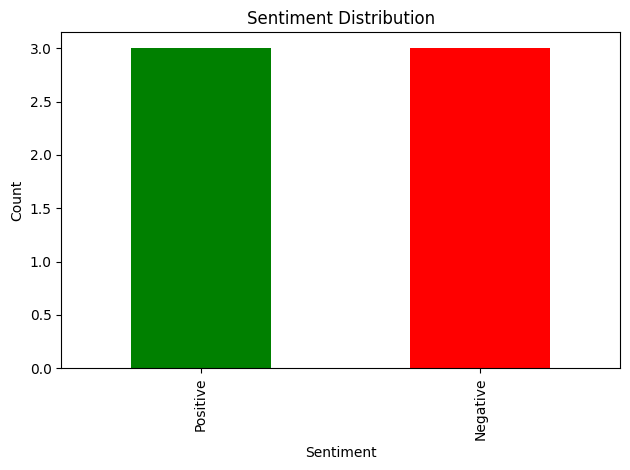

In [ ]:
# Step 3: WordCloud + Sentiment Plot
# WordCloud
all_words = " ".join(df['clean'])
wc = WordCloud(background_color='white').generate(all_words)

plt.figure(figsize=(8, 4))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.tight_layout()
plt.show()

# Sentiment bar plot
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
